### **Importando as bibliotecas**

In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

### **Carregando os dados** 

In [132]:
etanol11 = pd.read_csv('../Data/precos-gasolina-etanol-11.csv', sep=';')
etanol12 = pd.read_csv('../Data/precos-gasolina-etanol-12.csv', sep=';')



In [133]:
#t_et11 = etanol11.head(100)
#t_et12 = etanol12.head(100)



In [134]:
df = pd.concat([etanol11,etanol12], ignore_index=True) # Juntando as duas tabelas
df.drop(['Cep','CNPJ da Revenda','Valor de Compra','Unidade de Medida','Complemento','Numero Rua','Nome da Rua'], inplace=True, axis='columns') # Retirando
df = df.reindex(columns=['Regiao - Sigla','Estado - Sigla','Municipio','Bairro','Bandeira','Revenda','Valor de Venda','Produto','Data da Coleta']) # Reordenando rotulos
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y') # Mudando o Formato de Data 
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float) # Mudando o Formato do Preço

### Removendo "GASOLINA ADITIVADA"

In [135]:
i = df.loc[(df['Produto'] == "GASOLINA ADITIVADA")]
df.drop(i.index, inplace=True) # O .index informa que voce quer a linha, nao a coluna.
df

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,2023-11-01
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,2023-11-01
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,2023-11-01
5,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,4.85,ETANOL,2023-11-01
6,NE,AL,PALMEIRA DOS INDIOS,SAO CRISTOVAO,IPIRANGA,POSTO ZÉ TAVARES COMÉRCIO DE COMBUSTÍVEIS LTDA,6.22,GASOLINA,2023-11-01
...,...,...,...,...,...,...,...,...,...
101990,NE,MA,SANTA INES,PARQUE SANTA CRUZ,BRANCA,BARROS & CRUZ RODRIGUES LTDA,4.27,ETANOL,2023-12-29
101991,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,5.79,GASOLINA,2023-12-29
101992,S,PR,CAMPO LARGO,CENTRO,IPIRANGA,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,3.79,ETANOL,2023-12-29
101993,S,RS,OSORIO,CENTRO,RODOIL,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,5.49,GASOLINA,2023-12-29


### Revisando os dados

In [136]:
test = df.loc[df['Data da Coleta'] == '2023-11-01']
test

,Regiao - Sigla,Estado - Sigla,Municipio,Bairro,Bandeira,Revenda,Valor de Venda,Produto,Data da Coleta
0,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,6.30,GASOLINA,2023-11-01
2,NE,AL,PALMEIRA DOS INDIOS,JOSÉ MAIA COSTA,VIBRA,SEVERINO S. LOPES & CIA. LTDA,4.88,ETANOL,2023-11-01
3,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,6.19,GASOLINA,2023-11-01
5,NE,AL,PALMEIRA DOS INDIOS,VILA MARIA,VIBRA,A. B. LESSA NETO & CIA LTDA,4.85,ETANOL,2023-11-01
6,NE,AL,PALMEIRA DOS INDIOS,SAO CRISTOVAO,IPIRANGA,POSTO ZÉ TAVARES COMÉRCIO DE COMBUSTÍVEIS LTDA,6.22,GASOLINA,2023-11-01
...,...,...,...,...,...,...,...,...,...
2068,SE,MG,TEOFILO OTONI,SAO CRISTOVAO,RAIZEN,ATALAIA COMBUSTIVEIS E LUBRIFICANTES LTDA,5.49,GASOLINA,2023-11-01
2070,SE,MG,TEOFILO OTONI,SAO CRISTOVAO,RAIZEN,ATALAIA COMBUSTIVEIS E LUBRIFICANTES LTDA,3.69,ETANOL,2023-11-01
2071,S,RS,LAJEADO,SANTO ANDRE,CHARRUA,SIM REDE DE POSTOS LTDA,5.49,GASOLINA,2023-11-01
2073,S,RS,LAJEADO,SANTO ANDRE,CHARRUA,SIM REDE DE POSTOS LTDA,4.59,ETANOL,2023-11-01


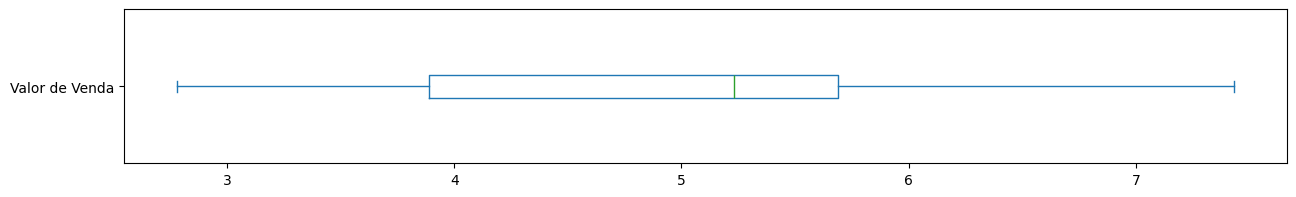

In [137]:
test['Valor de Venda'].plot.box(vert=False, figsize=(15,2));

<Axes: title={'center': 'Valor de Venda'}, ylabel='Data da Coleta'>

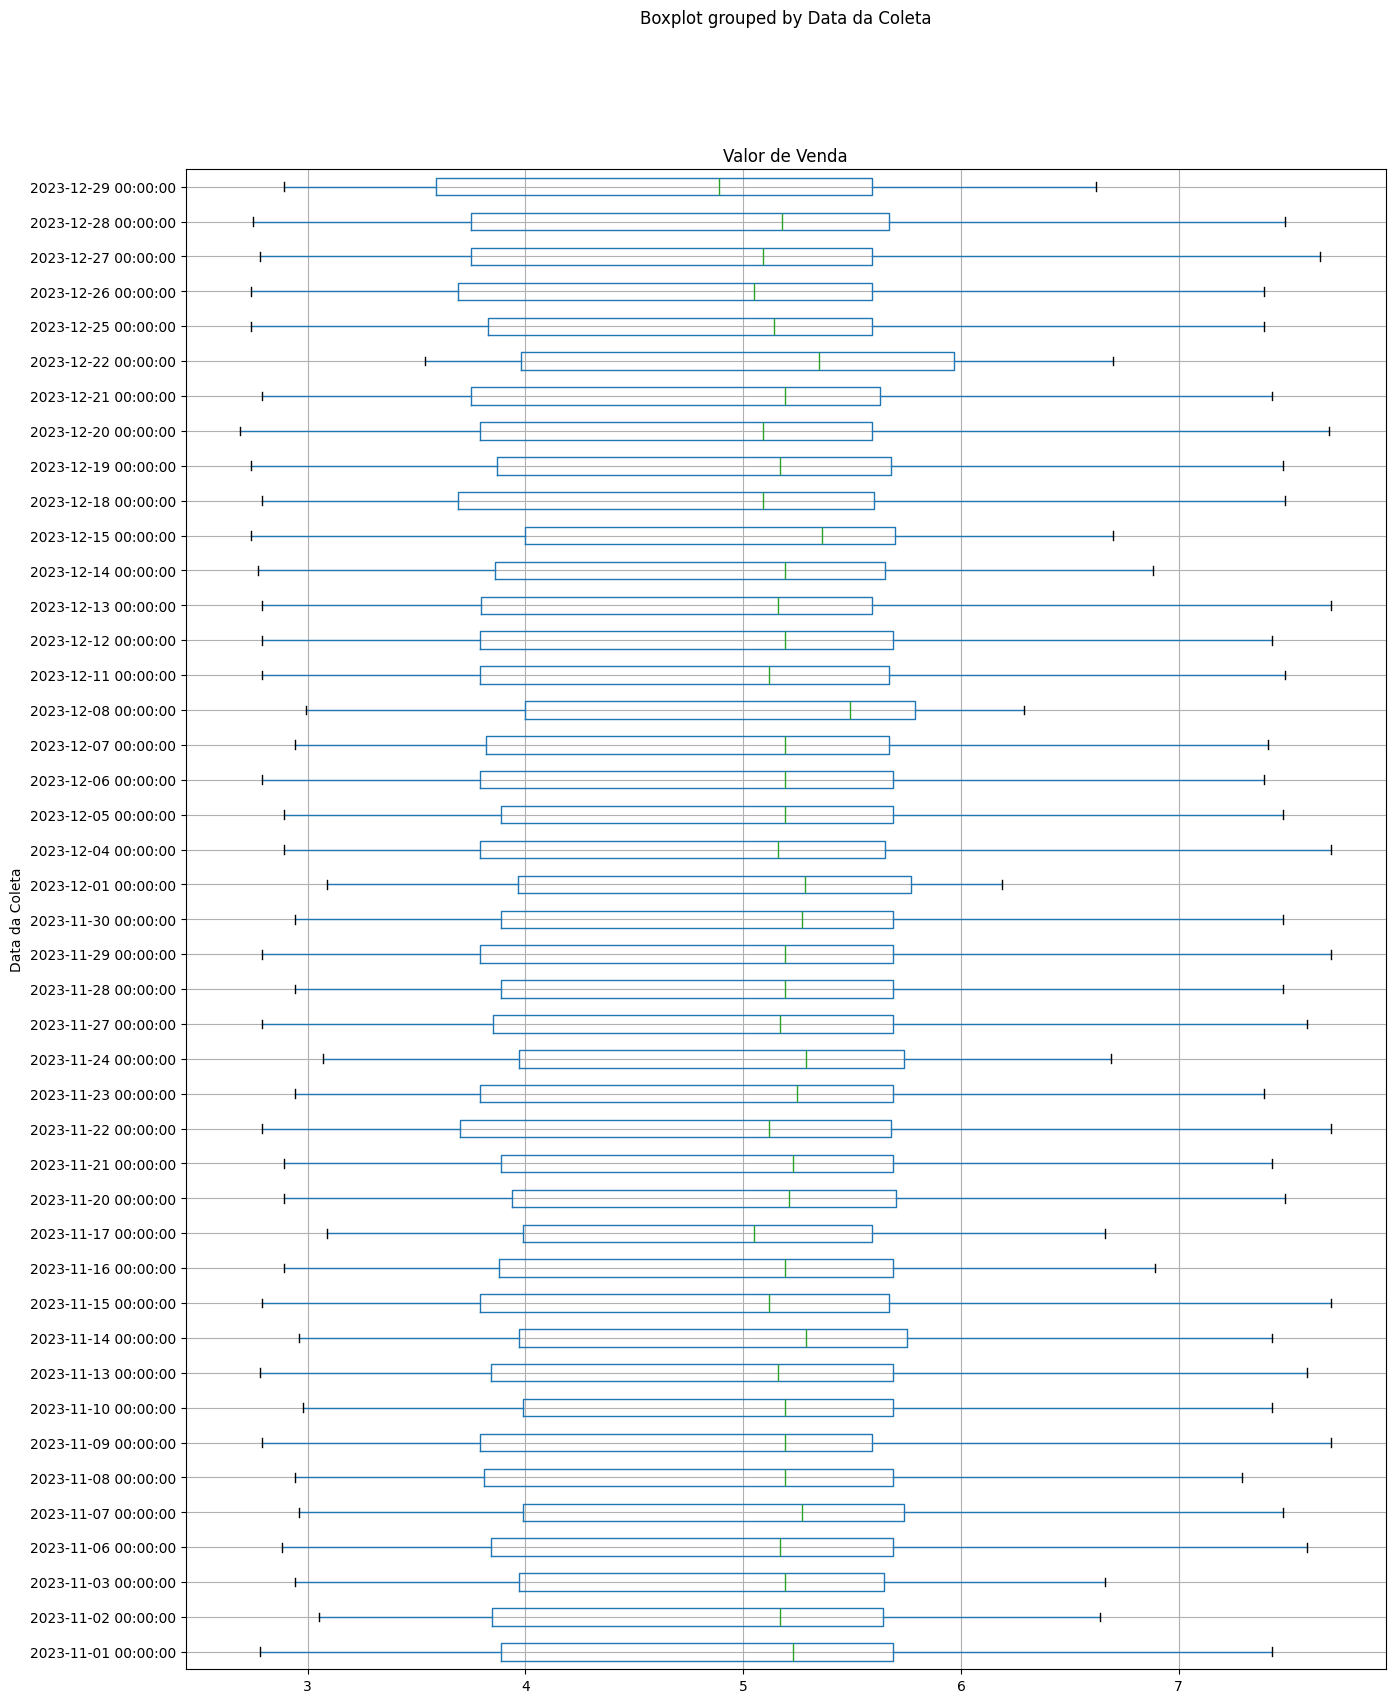

In [138]:
df.boxplot(vert = False, column='Valor de Venda', by='Data da Coleta', figsize =(15,20))

### Plotando

#### Pergunta 1 e 2

In [139]:
gp1 = df.groupby(['Data da Coleta','Produto'])['Valor de Venda'].mean()
gp1


Data da Coleta  Produto 
2023-11-01      ETANOL      3.879103
                GASOLINA    5.686607
2023-11-02      ETANOL      3.835196
                GASOLINA    5.628386
2023-11-03      ETANOL      3.974205
                              ...   
2023-12-27      GASOLINA    5.616852
2023-12-28      ETANOL      3.757453
                GASOLINA    5.682149
2023-12-29      ETANOL      3.605207
                GASOLINA    5.578553
Name: Valor de Venda, Length: 86, dtype: float64

In [140]:
df1 = pd.DataFrame(gp1)
df1

Valor de Venda
Data da Coleta Produto                 
2023-11-01     ETANOL          3.879103
               GASOLINA        5.686607
2023-11-02     ETANOL          3.835196
               GASOLINA        5.628386
2023-11-03     ETANOL          3.974205
...                                 ...
2023-12-27     GASOLINA        5.616852
2023-12-28     ETANOL          3.757453
               GASOLINA        5.682149
2023-12-29     ETANOL          3.605207
               GASOLINA        5.578553

[86 rows x 1 columns]

In [141]:
# o filtro do groupby e transformado em indices por isso tem de reseta-los
df1 = df1.reset_index()
df1

,Data da Coleta,Produto,Valor de Venda
0,2023-11-01,ETANOL,3.879103
1,2023-11-01,GASOLINA,5.686607
2,2023-11-02,ETANOL,3.835196
3,2023-11-02,GASOLINA,5.628386
4,2023-11-03,ETANOL,3.974205
...,...,...,...
81,2023-12-27,GASOLINA,5.616852
82,2023-12-28,ETANOL,3.757453
83,2023-12-28,GASOLINA,5.682149
84,2023-12-29,ETANOL,3.605207


In [142]:
df1 = df1.pivot_table(index='Produto', columns='Data da Coleta', values='Valor de Venda')
df1

Data da Coleta,2023-11-01,2023-11-02,2023-11-03,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-13,2023-11-14,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-25,2023-12-26,2023-12-27,2023-12-28,2023-12-29
Produto,,,,,,,,,,,,,,,,,,,,,
ETANOL,3.879103,3.835196,3.974205,3.824562,3.948826,3.825620,3.791846,4.012222,3.821632,3.908505,...,3.725945,3.780901,3.762321,3.731444,3.977273,3.835134,3.702903,3.732087,3.757453,3.605207
GASOLINA,5.686607,5.628386,5.700328,5.641920,5.707864,5.699992,5.670431,5.671392,5.654572,5.736272,...,5.623821,5.653653,5.573469,5.649424,5.965161,5.612367,5.579537,5.616852,5.682149,5.578553


1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do 
etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?

<Axes: xlabel='Data da Coleta'>

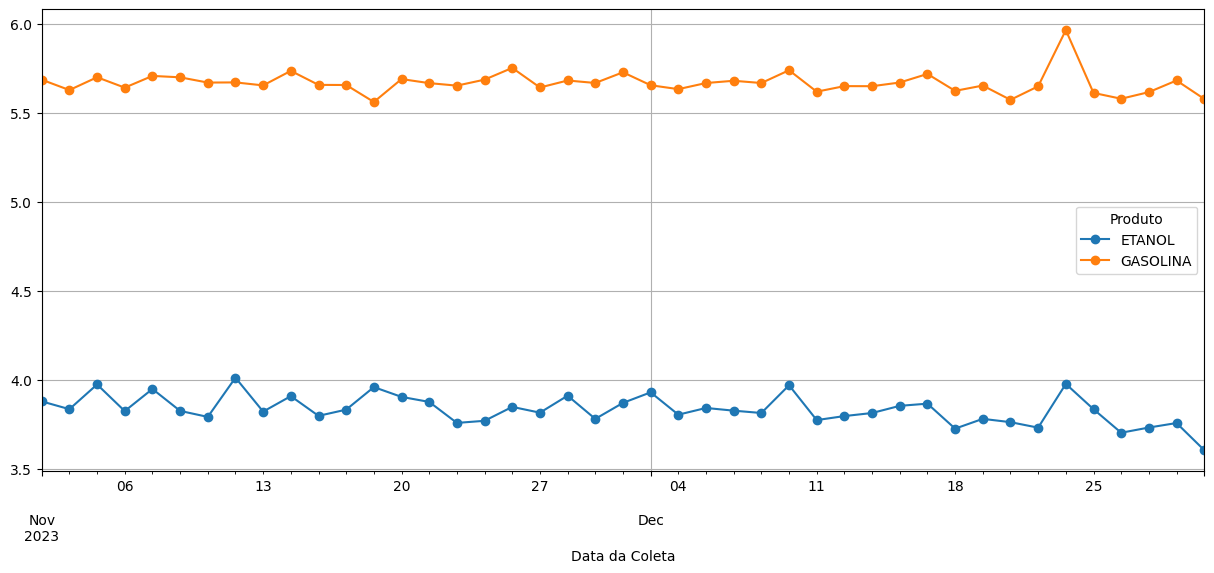

In [143]:
df1.T.plot(marker='o', grid = True, figsize=(15,6))

In [144]:
##### **Adcionando Médias**
media_etanol =df1.loc['ETANOL'].mean()
media_gas =df1.loc['GASOLINA'].mean()


In [145]:
# Tirando a prova real
print(df1.loc['ETANOL'].sum())
print(df1.loc['ETANOL'].count())

print(df1.loc['ETANOL'].sum()/df1.loc['ETANOL'].count())

164.84790158670222
43
3.8336721299233076


In [146]:
'''
# Adcionando ao dataframe original
df1.loc['Média Etanol'] = media_etanol
df1.loc['Média Gasolina'] = media_gas


#Criando dataframe
dfmedias1 = df1.loc[['Média Etanol', 'Média Gasolina']]

df1 = df1.drop(['Média Etanol', 'Média Gasolina'])

df1
'''

"\n# Adcionando ao dataframe original\ndf1.loc['Média Etanol'] = media_etanol\ndf1.loc['Média Gasolina'] = media_gas\n\n\n#Criando dataframe\ndfmedias1 = df1.loc[['Média Etanol', 'Média Gasolina']]\n\ndf1 = df1.drop(['Média Etanol', 'Média Gasolina'])\n\ndf1\n"

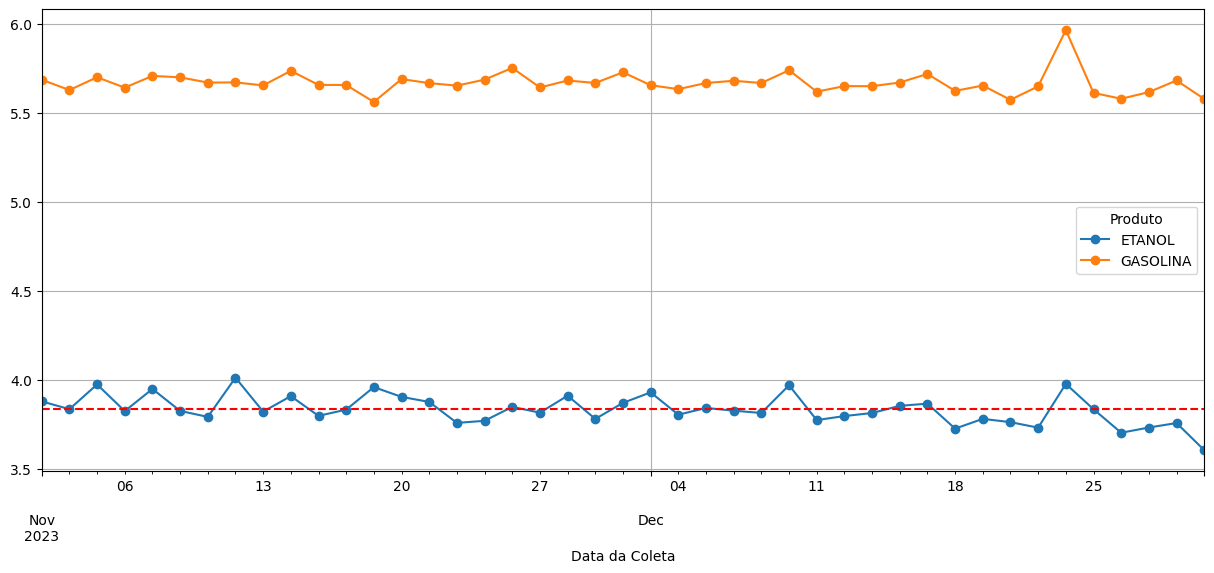

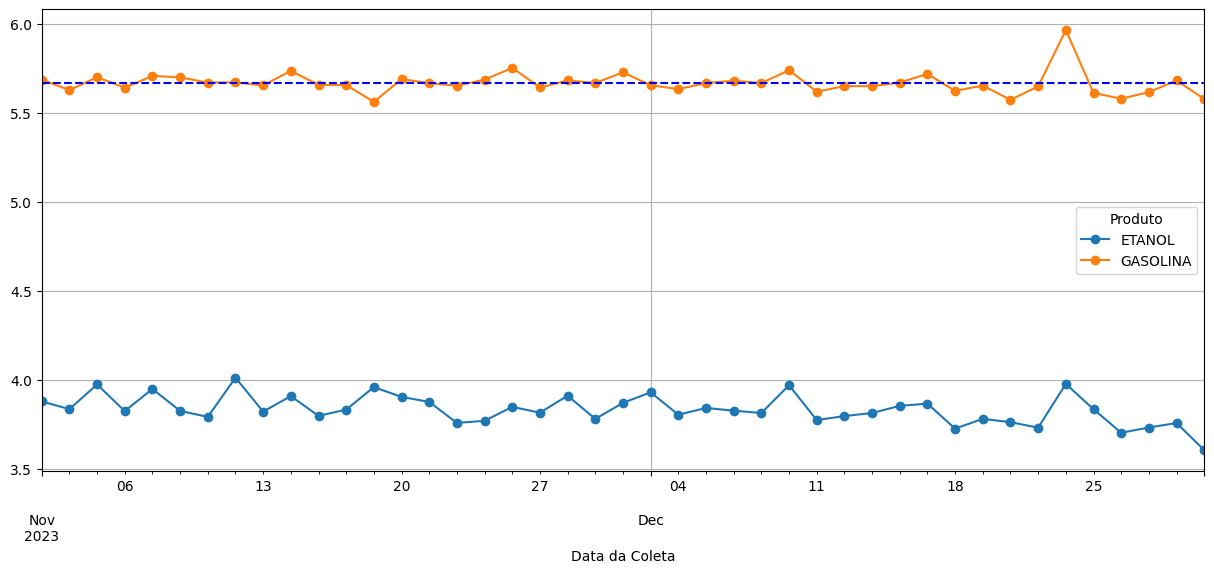

In [147]:
df1.T.plot(marker='o', grid = True, figsize=(15,6)).axhline(y=(media_etanol), color='red', linestyle='--')
df1.T.plot(marker='o', grid = True, figsize=(15,6)).axhline(y=(media_gas), color='blue', linestyle='--')

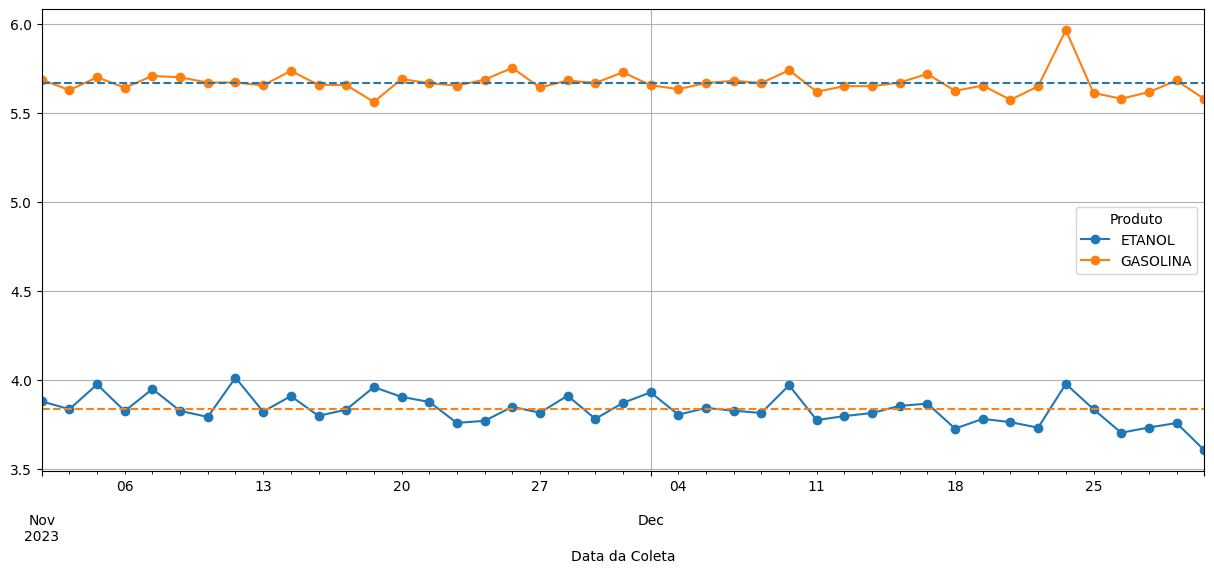

In [148]:
plot1 = df1.T.plot(marker='o', grid=True, figsize=(15,6))

plot1.axhline(y=media_etanol, color='C1', linestyle='--')
plot1.axhline(y=media_gas, color='C0', linestyle='--')


#### Pergunta 3 e 4

3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?

##### Com data

In [149]:
# Agrupar por estado, produto e data.
# Pegar as medias de valores por estado

gp2 = df.groupby(['Estado - Sigla','Data da Coleta','Produto'])['Valor de Venda'].mean()
gp2 = pd.DataFrame(gp2)
gp2

Valor de Venda
Estado - Sigla Data da Coleta Produto                 
AC             2023-11-01     GASOLINA        7.415000
               2023-11-07     ETANOL          5.790000
                              GASOLINA        7.466000
               2023-11-08     ETANOL          4.700000
                              GASOLINA        6.632143
...                                                ...
TO             2023-12-26     GASOLINA        5.639000
               2023-12-27     ETANOL          4.142000
                              GASOLINA        5.646923
               2023-12-28     ETANOL          4.138000
                              GASOLINA        5.768333

[1815 rows x 1 columns]

In [150]:
gp2.reset_index()

,Estado - Sigla,Data da Coleta,Produto,Valor de Venda
0,AC,2023-11-01,GASOLINA,7.415000
1,AC,2023-11-07,ETANOL,5.790000
2,AC,2023-11-07,GASOLINA,7.466000
3,AC,2023-11-08,ETANOL,4.700000
4,AC,2023-11-08,GASOLINA,6.632143
...,...,...,...,...
1810,TO,2023-12-26,GASOLINA,5.639000
1811,TO,2023-12-27,ETANOL,4.142000
1812,TO,2023-12-27,GASOLINA,5.646923
1813,TO,2023-12-28,ETANOL,4.138000


In [151]:
gp2_pivot = gp2.pivot_table(index=['Estado - Sigla', 'Produto'], columns='Data da Coleta', values='Valor de Venda')
gp2_pivot

Data da Coleta           2023-11-01  2023-11-02  2023-11-03  2023-11-06  \
Estado - Sigla Produto                                                    
AC             ETANOL           NaN         NaN         NaN         NaN   
               GASOLINA    7.415000         NaN         NaN         NaN   
AL             ETANOL      4.933333         NaN         NaN    4.487083   
               GASOLINA    6.272500         NaN         NaN    5.866522   
AM             ETANOL      4.690000         NaN         NaN    4.590000   
               GASOLINA    6.060000         NaN         NaN    6.490000   
AP             ETANOL           NaN         NaN         NaN         NaN   
               GASOLINA         NaN    5.843333         NaN         NaN   
BA             ETANOL      4.396296    4.190556    3.974000    4.367778   
               GASOLINA    5.978679    5.717778    5.596000    6.072432   
CE             ETANOL      4.477692    4.227500    4.614048    4.702174   
               GASOLINA    5.737083    5.324167    5.786190    5.832308   
DF             ETANOL      3.680833         NaN         NaN    3.740000   
               GASOLINA    5.562778         NaN         NaN    5.610000   
ES             ETANOL      4.098333         NaN         NaN    4.130345   
               GASOLINA    6.040000         NaN         NaN    5.879400   
GO             ETANOL      3.646190         NaN    3.358667    3.502105   
               GASOLINA    5.645952         NaN    5.396667    5.513276   
MA             ETANOL      4.680000         NaN    4.090000    4.633636   
               GASOLINA    5.420000         NaN    5.040000    5.800000   
MG             ETANOL      3.505818    3.638750    3.702000    3.622458   
               GASOLINA    5.422632    5.664375    5.703333    5.593529   
MS             ETANOL      4.150000         NaN         NaN    3.696571   
               GASOLINA    6.190000         NaN         NaN    5.680000   
MT             ETANOL      3.305000    3.420000    3.462000    3.248750   
               GASOLINA    5.785000    6.430000    5.834000    5.643750   
PA             ETANOL      4.676667    4.550000    4.900000    4.179000   
               GASOLINA    6.461304    6.326667    6.232500    5.643333   
PB             ETANOL      4.245714    4.052500    4.012857    4.133939   
               GASOLINA    5.755714    5.573750    5.630000    5.734000   
PE             ETANOL      4.220000    4.850000    3.881667    4.036400   
               GASOLINA    5.682500    6.635000    5.391667    5.368704   
PI             ETANOL      4.120000    4.040000    4.055556    4.158750   
               GASOLINA    5.410000    5.480000    5.458000    5.487778   
PR             ETANOL      3.917586    3.834242    3.856190    3.737222   
               GASOLINA    5.810118    5.759697    5.816190    5.708772   
RJ             ETANOL      4.001944    4.027027         NaN    4.100252   
               GASOLINA    5.673846    5.584103         NaN    5.662195   
RN             ETANOL      4.488182         NaN         NaN    4.333333   
               GASOLINA    5.610000         NaN         NaN    5.613333   
RO             ETANOL      6.470000         NaN    5.390000    4.992000   
               GASOLINA    6.530000         NaN    6.652857    6.336471   
RR             ETANOL           NaN         NaN         NaN         NaN   
               GASOLINA    5.980000         NaN         NaN    5.876000   
RS             ETANOL      4.677500    4.360000         NaN    4.549833   
               GASOLINA    5.554906    5.598182    6.140000    5.492920   
SC             ETANOL      4.674545         NaN    4.500000    4.368824   
               GASOLINA    5.703103    5.870000    5.602000    5.726897   
SE             ETANOL           NaN         NaN         NaN    4.690000   
               GASOLINA         NaN         NaN         NaN    6.145000   
SP             ETANOL      3.442500    3.530580    3.209643    3.462309   
               GASOLINA  

<Axes: ylabel='Estado - Sigla,Data da Coleta,Produto'>

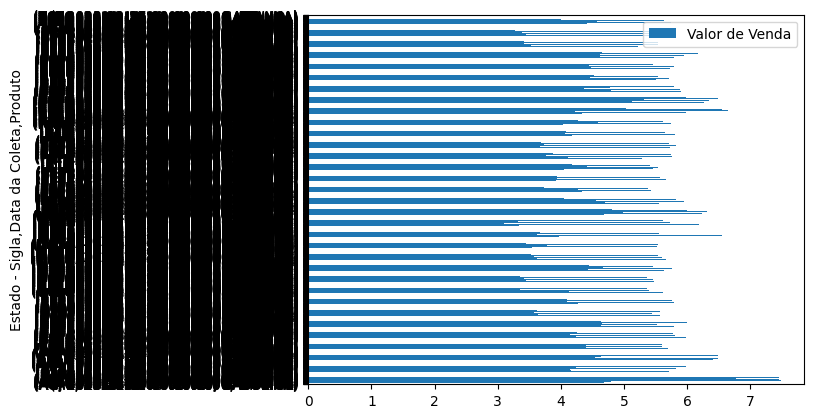

In [152]:
gp2.plot.barh()

##### Sem data

In [153]:
# Precisa de data?
gp2 = df.groupby(['Estado - Sigla','Produto'])['Valor de Venda'].mean()
gp2 = pd.DataFrame(gp2)
gp2


Valor de Venda
Estado - Sigla Produto                 
AC             ETANOL          4.808250
               GASOLINA        6.894907
AL             ETANOL          4.306241
               GASOLINA        5.868059
AM             ETANOL          4.551735
               GASOLINA        6.601109
AP             ETANOL          5.397500
               GASOLINA        5.568994
BA             ETANOL          4.238109
               GASOLINA        5.888282
CE             ETANOL          4.528349
               GASOLINA        5.795289
DF             ETANOL          3.600460
               GASOLINA        5.532317
ES             ETANOL          4.138996
               GASOLINA        5.764608
GO             ETANOL          3.503608
               GASOLINA        5.532579
MA             ETANOL          4.424092
               GASOLINA        5.512465
MG             ETANOL          3.553628
               GASOLINA        5.539809
MS             ETANOL          3.648490
               GASOLINA        5.709834
MT             ETANOL          3.170450
               GASOLINA        5.649198
PA             ETANOL          4.606010
               GASOLINA        6.001357
PB             ETANOL          3.980656
               GASOLINA        5.584381
PE             ETANOL          3.997808
               GASOLINA        5.472004
PI             ETANOL          4.077849
               GASOLINA        5.386226
PR             ETANOL          3.761886
               GASOLINA        5.746458
RJ             ETANOL          4.102228
               GASOLINA        5.695776
RN             ETANOL          4.441496
               GASOLINA        5.696989
RO             ETANOL          5.088654
               GASOLINA        6.439335
RR             ETANOL          4.872857
               GASOLINA        5.892336
RS             ETANOL          4.596458
               GASOLINA        5.605301
SC             ETANOL          4.343896
               GASOLINA        5.734883
SE             ETANOL          4.381404
               GASOLINA        5.655691
SP             ETANOL          3.412366
               GASOLINA        5.522834
TO             ETANOL          4.247546
               GASOLINA        5.841281

In [154]:
gp2 = gp2['Valor de Venda'].unstack(level='Produto')
gp2

Produto,ETANOL,GASOLINA
Estado - Sigla,,
AC,4.808250,6.894907
AL,4.306241,5.868059
AM,4.551735,6.601109
AP,5.397500,5.568994
BA,4.238109,5.888282
CE,4.528349,5.795289
DF,3.600460,5.532317
ES,4.138996,5.764608
GO,3.503608,5.532579


In [155]:
gp2E = gp2.sort_values(by = 'ETANOL', ascending=False)
gp2G = gp2.sort_values(by = 'GASOLINA',ascending=False)

<Axes: title={'center': 'Medias de combustivel por estado'}, xlabel='Estado - Sigla'>

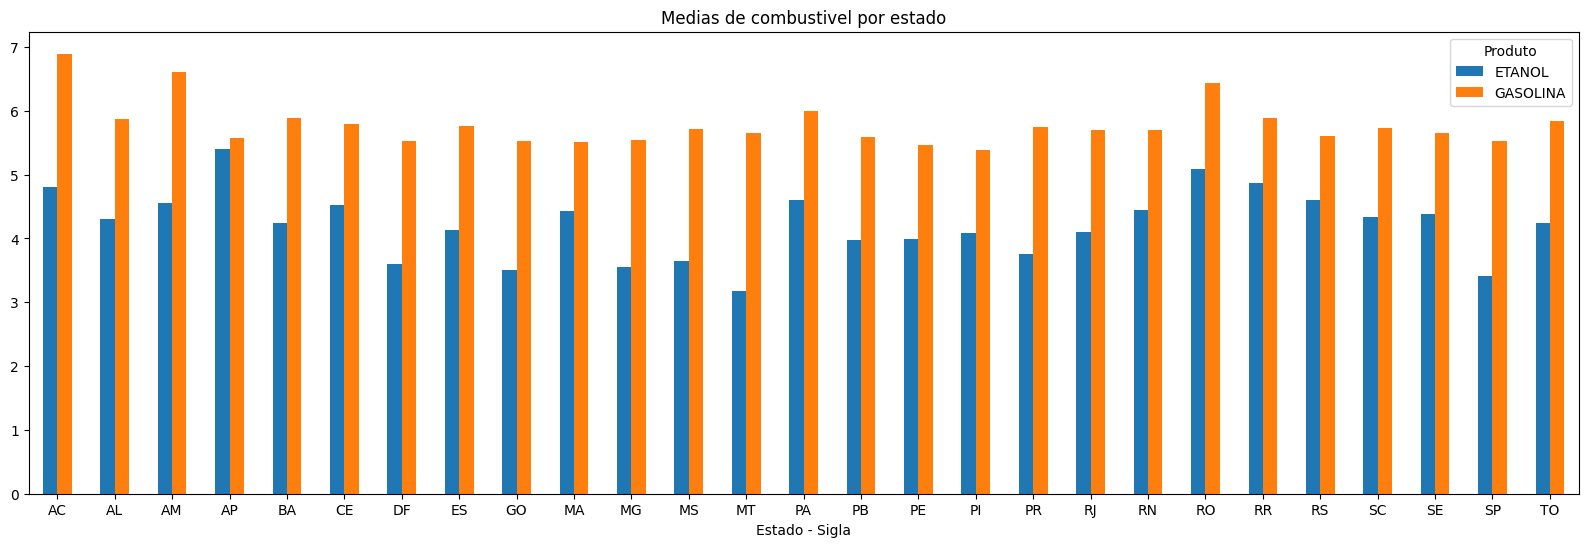

In [156]:
gp2.plot.bar(rot = 0, figsize=(20,6),title='Medias de combustivel por estado')

<Axes: title={'center': 'Estados com o media Etanol mais caro'}, xlabel='Estado - Sigla'>

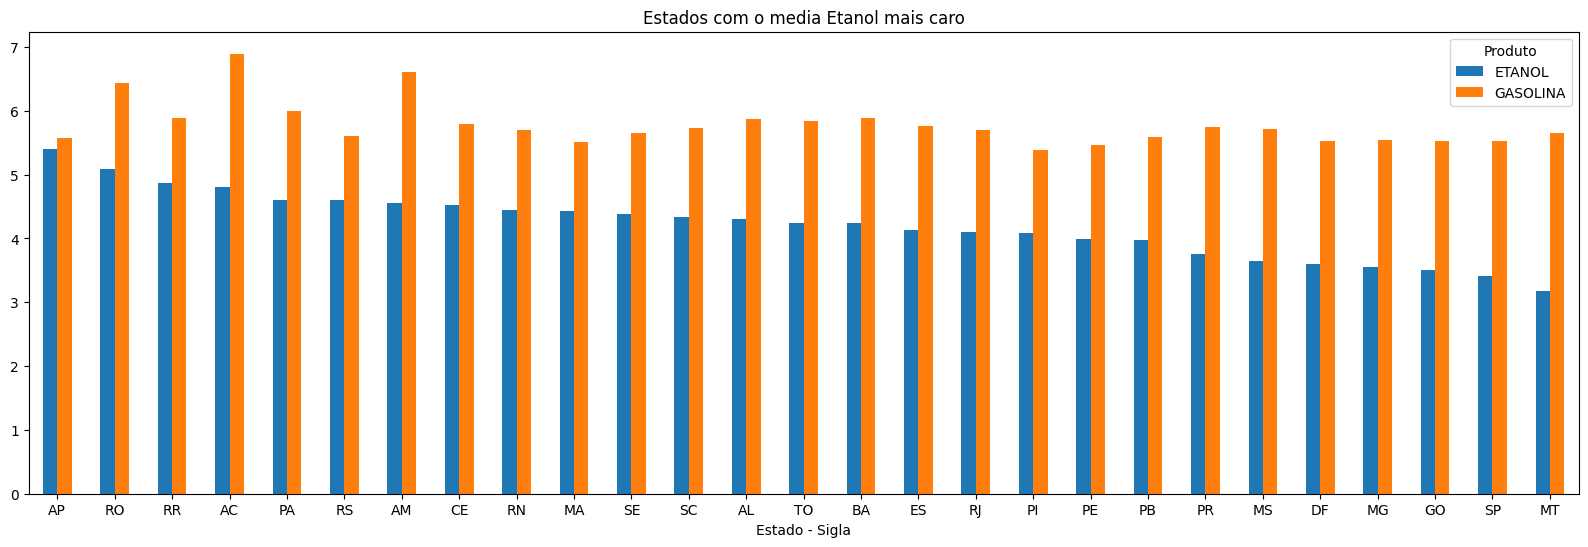

In [157]:
gp2E.plot.bar(rot = 0, figsize=(20,6),title='Estados com o media Etanol mais caro')

<Axes: title={'center': 'Estados com a media Gasolina mais cara'}, xlabel='Estado - Sigla'>

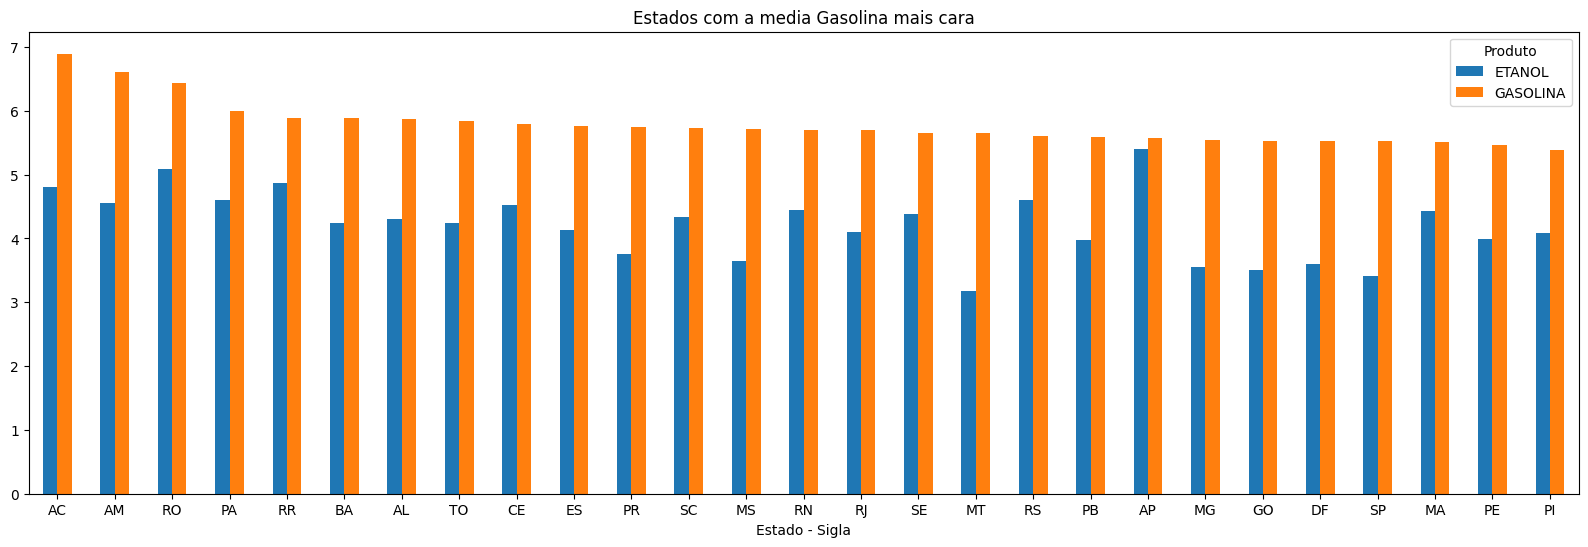

In [158]:
gp2G.plot.bar(rot = 0, figsize=(20,6),title='Estados com a media Gasolina mais cara')

### 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [159]:
top_E_gp2 = gp2['ETANOL']
top_E_gp2 = top_E_gp2.sort_values(ascending=False)
#top_E_gp2 = gp2.sort_values(by=['ETANOL'])
top_E_gp2 = top_E_gp2.head(5)
#top_E_gp2

In [160]:
top_G_gp2 = gp2['GASOLINA']
top_G_gp2 = top_G_gp2.sort_values(ascending=False)
top_G_gp2 = top_G_gp2.head(5)


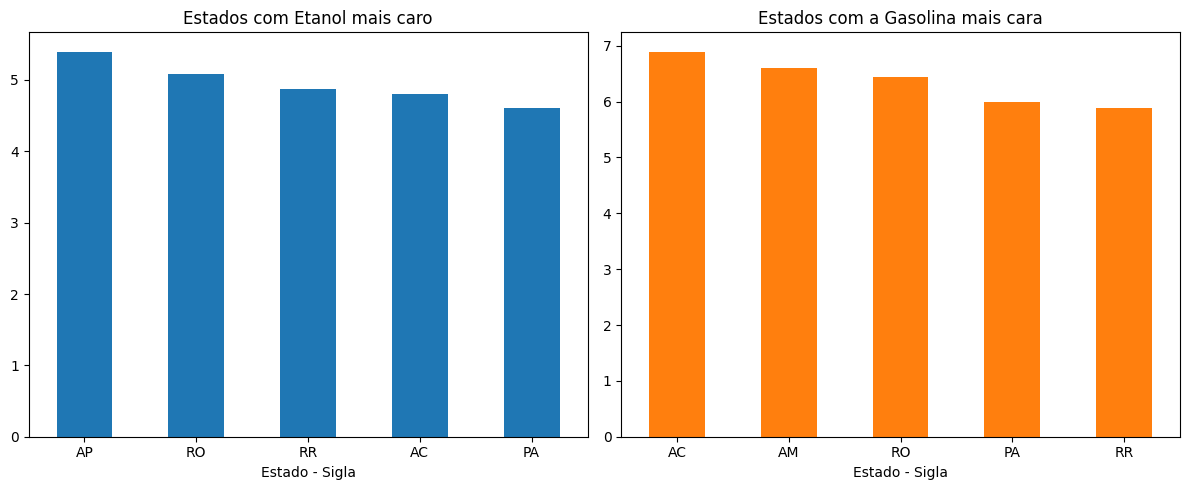

In [161]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
top_E_gp2.plot.bar(rot=0, title='Estados com Etanol mais caro', color='C0', ax=axs[0])
top_G_gp2.plot.bar(rot=0, title='Estados com a Gasolina mais cara', color='C1', ax=axs[1])
plt.tight_layout()


In [162]:
top_E_gp2_R = top_E_gp2.map('${:.2f}'.format)
top_G_gp2_R = top_G_gp2.map('${:.2f}'.format)

# Etanol
print("Top 5 Estados com o preço médio mais alto para o Etanol:")
print(top_E_gp2_R.to_string(index=True, header=False))

# Gasolina
print("\nTop 5 Estados com o preço médio mais alto para a Gasolina:")
print(top_G_gp2_R.to_string(index=True, header=False))

Top 5 Estados com o preço médio mais alto para o Etanol:
AP    $5.40
RO    $5.09
RR    $4.87
AC    $4.81
PA    $4.61

Top 5 Estados com o preço médio mais alto para a Gasolina:
AC    $6.89
AM    $6.60
RO    $6.44
PA    $6.00
RR    $5.89


#### Pergunta 5 e 6

5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?

In [163]:
gp3 = df.groupby(['Municipio','Estado - Sigla','Produto'])['Valor de Venda'].mean() #Tirar 'Estado - Sigla' caso nao queira que apareca o estado
gp3 = pd.DataFrame(gp3)
gp3 = gp3['Valor de Venda'].unstack(level='Produto')
gp3

,Produto,ETANOL,GASOLINA
Municipio,Estado - Sigla,,
ABAETETUBA,PA,NaN,6.032759
ACAILANDIA,MA,4.558333,5.938421
ADAMANTINA,SP,2.999583,5.469028
AGUAS LINDAS DE GOIAS,GO,3.752813,5.675937
ALAGOINHAS,BA,3.932500,5.581719
...,...,...,...
VOLTA REDONDA,RJ,4.311739,5.864267
VOTORANTIM,SP,3.386415,5.529245
VOTUPORANGA,SP,3.103889,5.502778


In [164]:
gp3max = df.groupby(['Municipio','Estado - Sigla','Produto'])['Valor de Venda'].max() #Tirar 'Estado - Sigla' caso nao queira que apareca o estado
gp3max = pd.DataFrame(gp3max)
gp3max = gp3max['Valor de Venda'].unstack(level='Produto')
gp3max

,Produto,ETANOL,GASOLINA
Municipio,Estado - Sigla,,
ABAETETUBA,PA,NaN,6.35
ACAILANDIA,MA,4.69,6.19
ADAMANTINA,SP,3.29,5.69
AGUAS LINDAS DE GOIAS,GO,3.99,5.89
ALAGOINHAS,BA,4.49,5.79
...,...,...,...
VOLTA REDONDA,RJ,4.59,6.09
VOTORANTIM,SP,3.85,5.93
VOTUPORANGA,SP,3.44,5.89


In [165]:
gp3min = df.groupby(['Municipio','Estado - Sigla','Produto'])['Valor de Venda'].min() #Tirar 'Estado - Sigla' caso nao queira que apareca o estado
gp3min = pd.DataFrame(gp3min)
gp3min = gp3min['Valor de Venda'].unstack(level='Produto')
gp3min


,Produto,ETANOL,GASOLINA
Municipio,Estado - Sigla,,
ABAETETUBA,PA,NaN,5.75
ACAILANDIA,MA,4.29,5.49
ADAMANTINA,SP,2.74,5.18
AGUAS LINDAS DE GOIAS,GO,3.45,5.25
ALAGOINHAS,BA,3.50,5.14
...,...,...,...
VOLTA REDONDA,RJ,4.09,5.69
VOTORANTIM,SP,2.97,4.99
VOTUPORANGA,SP,2.93,4.99


In [166]:
# menor preço para a etanol
pot_E_gp3 = gp3min['ETANOL']
pot_E_gp3 = pot_E_gp3.sort_values()
pot_E_gp3 = pot_E_gp3.head(5)

# menor preço para a gasolina
pot_G_gp3 = gp3min['GASOLINA']
pot_G_gp3 = pot_G_gp3.sort_values()
pot_G_gp3 = pot_G_gp3.head(5)

In [167]:
# mair preço para a etanol
top_E_gp3 = gp3max['ETANOL']
top_E_gp3 = top_E_gp3.sort_values(ascending=False)
top_E_gp3 = top_E_gp3.head(5)

# mair preço para a gasolina
top_G_gp3 = gp3max['GASOLINA']
top_G_gp3 = top_G_gp3.sort_values(ascending=False)
top_G_gp3 = top_G_gp3.head(5)

In [168]:
# 5. Qual o município que possui o menor preço para a gasolina e para o etanol?
# 6. Qual o município que possui o maior preço para a gasolina e para o etanol?
print(f'O município que possui o menor preço para a gasolina: {pot_G_gp3.index[0]} - R${pot_G_gp3.iloc[0]}')
print(f'O município que possui o menor preço para o etanol: {pot_E_gp3.index[0]} - R${pot_E_gp3.iloc[0]}')
print()
print(f'O município que possui o maior preço para a gasolina: {top_G_gp3.index[0]} - R${top_G_gp3.iloc[0]}')
print(f'O município que possui o maior preço para o etanol: {top_E_gp3.index[0]} - R${top_E_gp3.iloc[0]}')

O município que possui o menor preço para a gasolina: ('SAO CARLOS', 'SP') - R$4.49
O município que possui o menor preço para o etanol: ('SAO PAULO', 'SP') - R$2.69

O município que possui o maior preço para a gasolina: ('TEFE', 'AM') - R$7.7
O município que possui o maior preço para o etanol: ('SANTAREM', 'PA') - R$6.6


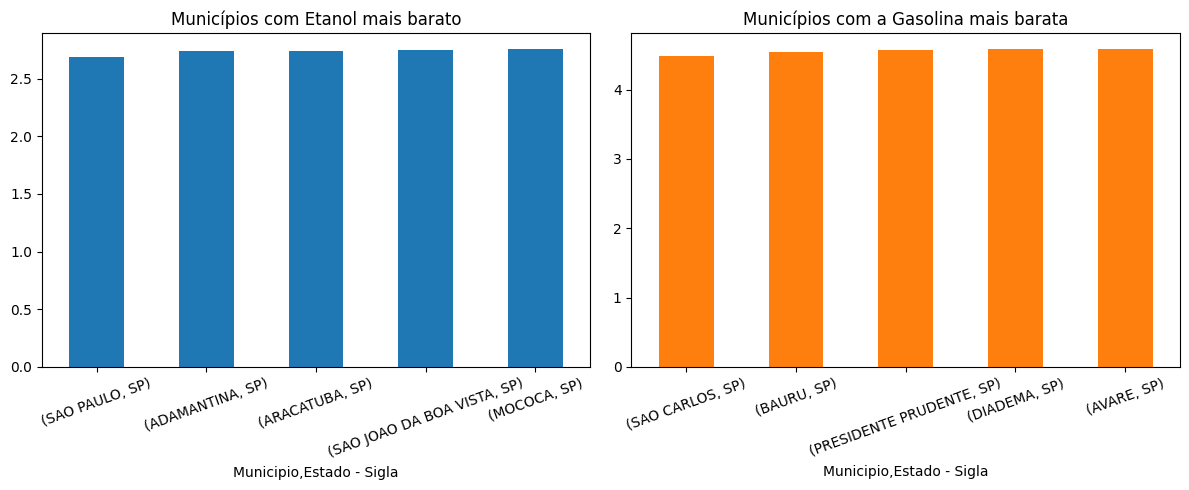

In [169]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pot_E_gp3.plot.bar(rot=20, title='Municípios com Etanol mais barato', color='C0', ax=axs[0])
pot_G_gp3.plot.bar(rot=20, title='Municípios com a Gasolina mais barata', color='C1', ax=axs[1])
plt.tight_layout()


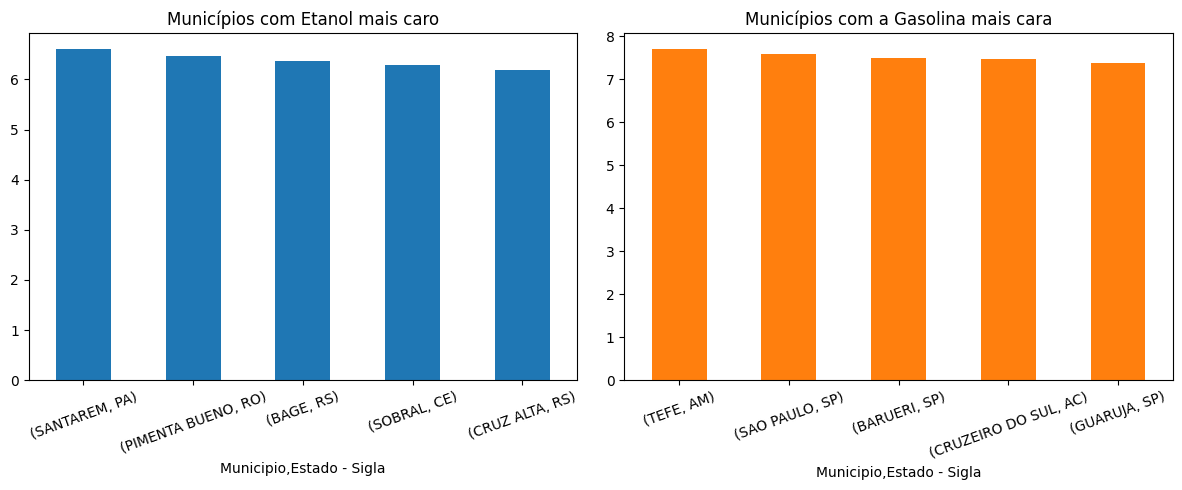

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
top_E_gp3.plot.bar(rot=20, title='Municípios com Etanol mais caro', color='C0', ax=axs[0])
top_G_gp3.plot.bar(rot=20, title='Municípios com a Gasolina mais cara', color='C1', ax=axs[1])
plt.tight_layout()


### Tentando por o grafico de forma mais clara

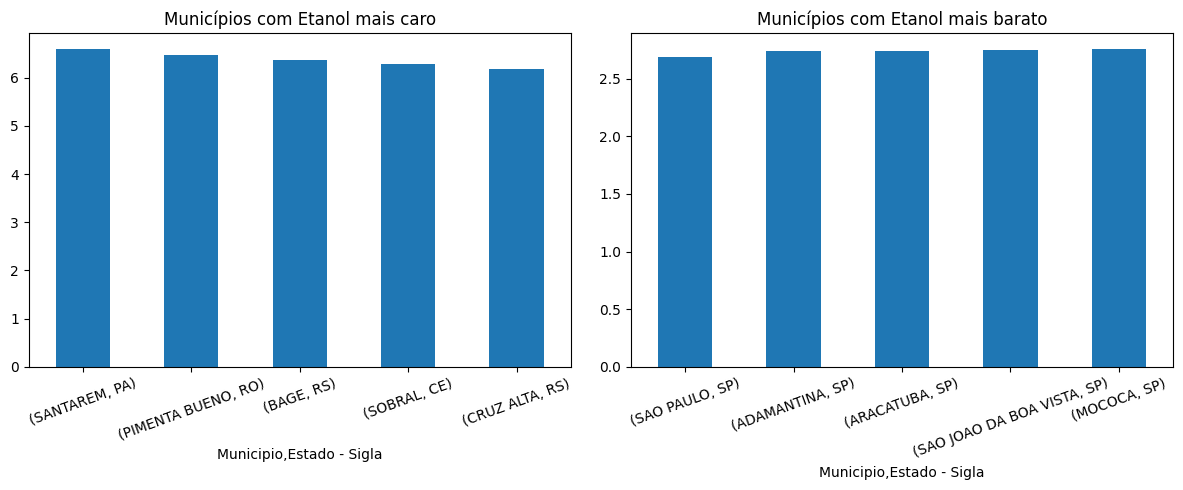

In [171]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
top_E_gp3.plot.bar(rot=20, title='Municípios com Etanol mais caro', color='C0', ax=axs[0])
pot_E_gp3.plot.bar(rot=20, title='Municípios com Etanol mais barato', color='C0', ax=axs[1])

plt.tight_layout()


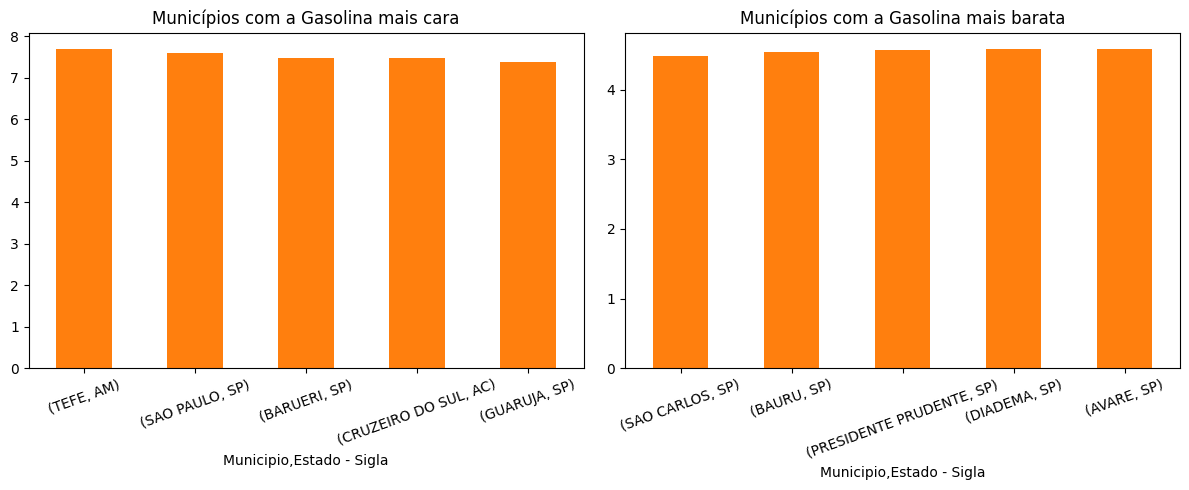

In [172]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
top_G_gp3.plot.bar(rot=20, title='Municípios com a Gasolina mais cara', color='C1', ax=axs[0])
pot_G_gp3.plot.bar(rot=20, title='Municípios com a Gasolina mais barata', color='C1', ax=axs[1])
plt.tight_layout()

7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?

In [173]:
df.value_counts('Regiao - Sigla')

Regiao - Sigla
SE    35728
NE    14764
S     11369
CO     5747
N      4082
Name: count, dtype: int64

In [174]:
gp4 = df.groupby(['Regiao - Sigla','Produto'])['Valor de Venda'].mean()
gp4 = pd.DataFrame(gp4)
gp4 = gp4['Valor de Venda'].unstack(level='Produto')
gp4


Produto,ETANOL,GASOLINA
Regiao - Sigla,,
CO,3.479649,5.580768
N,4.584460,6.171947
NE,4.249076,5.686899
S,4.078209,5.687915
SE,3.572342,5.564621


In [175]:
# Sem filtrar os produtos
top_G_gp4 = gp4.sort_values(by = 'GASOLINA')
top_G_gp4

Produto,ETANOL,GASOLINA
Regiao - Sigla,,
SE,3.572342,5.564621
CO,3.479649,5.580768
NE,4.249076,5.686899
S,4.078209,5.687915
N,4.584460,6.171947


In [176]:
# Sem filtrar os produtos
pot_E_gp4 = gp4.sort_values(by = 'ETANOL',ascending=False)
pot_E_gp4

Produto,ETANOL,GASOLINA
Regiao - Sigla,,
N,4.584460,6.171947
NE,4.249076,5.686899
S,4.078209,5.687915
SE,3.572342,5.564621
CO,3.479649,5.580768


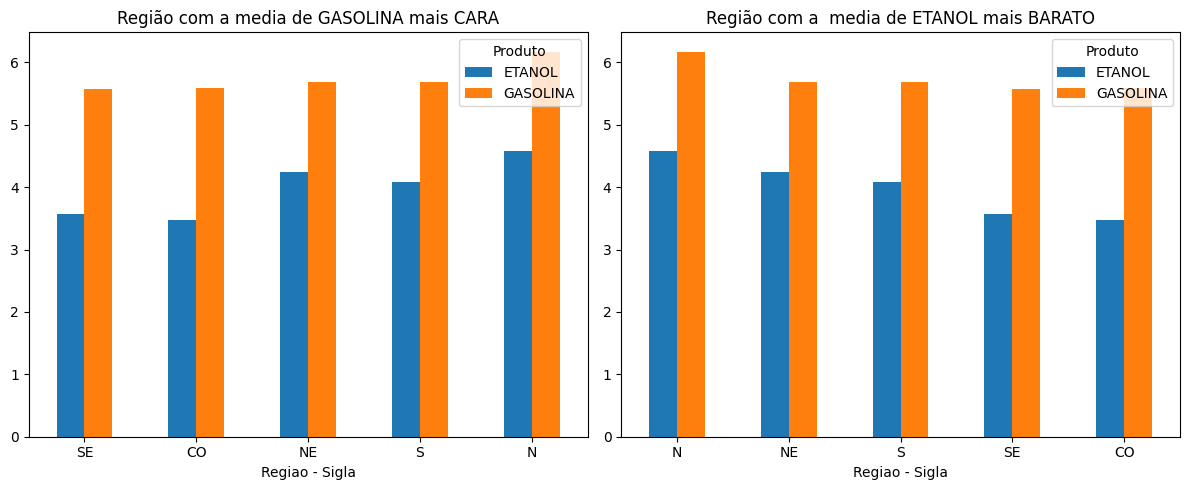

In [177]:
'''
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
'''

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
top_G_gp4.plot.bar(rot=0, title='Região com a media de GASOLINA mais CARA', ax=axs[0])
pot_E_gp4.plot.bar(rot=0, title='Região com a  media de ETANOL mais BARATO', ax=axs[1])
plt.tight_layout()


9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

In [178]:
gp5 = df.groupby(['Regiao - Sigla','Data da Coleta', 'Produto'])['Valor de Venda'].mean()
gp5 = pd.DataFrame(gp5)
gp5 = gp5['Valor de Venda'].unstack()
gp5

#gp5E = df.loc('Regiao - Sigla') & ('Produto' == 'ETANOL')['Valor de Venda']
# gp5E = df.loc[df['Produto'] == 'ETANOL', ['Regiao - Sigla', 'Valor de Venda','Data da Coleta']]
#gp5E = pd.DataFrame(gp5E)

#gp5E.set_index(['Data da Coleta', 'Regiao - Sigla'], inplace=True)
#gp5E = gp5E['Valor de Venda'].unstack(level='Regiao - Sigla')


#gp5E = gp5E.reset_index(drop=True)
#gp5E = gp5E.unstack()

#gp5E

Produto                          ETANOL  GASOLINA
Regiao - Sigla Data da Coleta                    
CO             2023-11-01      3.638644  5.639846
               2023-11-02      3.420000  6.430000
               2023-11-03      3.384500  5.506000
               2023-11-06      3.563981  5.594720
               2023-11-07      3.510000  5.635472
...                                 ...       ...
SE             2023-12-25      3.588789  5.503131
               2023-12-26      3.496860  5.533077
               2023-12-27      3.490605  5.533727
               2023-12-28      3.454176  5.546164
               2023-12-29      3.388034  5.475410

[213 rows x 2 columns]

In [186]:
gp5E = gp5['ETANOL']
gp5E = gp5E.unstack(level='Regiao - Sigla')
gp5E

Regiao - Sigla,CO,N,NE,S,SE
Data da Coleta,,,,,
2023-11-01,3.638644,4.534333,4.418056,4.135328,3.527292
2023-11-02,3.420000,4.550000,4.186750,3.915128,3.695328
2023-11-03,3.384500,4.839000,4.340000,4.017143,3.381395
2023-11-06,3.563981,4.498571,4.306231,4.227939,3.611767
2023-11-07,3.510000,4.644483,4.307363,4.098698,3.678695
2023-11-08,3.355735,4.842143,4.326748,4.084844,3.585030
2023-11-09,3.455278,4.905455,4.328391,3.974167,3.588315
2023-11-10,3.270000,4.525714,4.069600,4.420000,3.701739
2023-11-13,3.526777,4.541481,4.306494,4.072632,3.631343


In [185]:
gp5G = gp5['GASOLINA']
gp5G = gp5G.unstack(level='Regiao - Sigla')
gp5G

Regiao - Sigla,CO,N,NE,S,SE
Data da Coleta,,,,,
2023-11-01,5.639846,6.262800,5.808101,5.710539,5.543021
2023-11-02,6.430000,6.085000,5.613415,5.722667,5.566589
2023-11-03,5.506000,6.353571,5.662632,5.759375,5.595854
2023-11-06,5.594720,6.127123,5.721062,5.620161,5.590254
2023-11-07,5.635472,6.192252,5.664587,5.712462,5.640147
2023-11-08,5.508592,6.516000,5.819779,5.733763,5.571623
2023-11-09,5.588108,6.117455,5.773854,5.757333,5.542168
2023-11-10,5.370000,6.245000,5.359200,5.662667,5.723462
2023-11-13,5.540147,6.181622,5.719418,5.648833,5.587771


In [187]:
gp5E.corr()

Regiao - Sigla,CO,N,NE,S,SE
Regiao - Sigla,,,,,
CO,1.000000,-0.074046,0.292111,-0.005159,0.105346
N,-0.074046,1.000000,0.077338,-0.195396,0.104482
NE,0.292111,0.077338,1.000000,-0.143012,0.116131
S,-0.005159,-0.195396,-0.143012,1.000000,0.341813
SE,0.105346,0.104482,0.116131,0.341813,1.000000


In [188]:
gp5G.corr()

Regiao - Sigla,CO,N,NE,S,SE
Regiao - Sigla,,,,,
CO,1.000000,-0.036362,0.140010,0.028372,0.079017
N,-0.036362,1.000000,0.111447,0.215033,0.162177
NE,0.140010,0.111447,1.000000,0.092184,-0.440259
S,0.028372,0.215033,0.092184,1.000000,-0.071477
SE,0.079017,0.162177,-0.440259,-0.071477,1.000000


10.  Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?


In [193]:
gp6 = df.groupby(['Bandeira','Data da Coleta', 'Produto'])['Valor de Venda'].mean()
gp6 = pd.DataFrame(gp6)
gp6 = gp6['Valor de Venda'].unstack()
gp6

Produto                       ETANOL  GASOLINA
Bandeira    Data da Coleta                    
ALESAT      2023-11-01      3.807857  5.614194
            2023-11-02      3.865714  5.622857
            2023-11-03      4.963333  5.995000
            2023-11-06      3.891702  5.627586
            2023-11-07      3.900800  5.638136
...                              ...       ...
WALENDOWSKY 2023-11-20      4.590000  5.980000
            2023-11-27      4.590000  5.980000
            2023-12-04      4.590000  5.980000
            2023-12-18      4.290000  5.980000
            2023-12-27      4.290000  5.980000

[932 rows x 2 columns]

In [197]:
gp6E = gp6['ETANOL']
gp6E = gp6E.unstack(level='Bandeira')


gp6G = gp6['GASOLINA']
gp6G = gp6G.unstack(level='Bandeira')


# TEm que fazer alguma relação com a região para diminuir a quantidade

In [198]:
gp6E.corr()

Bandeira,ALESAT,ATEM' S,ATLÂNTICA,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,DISLUB,D`MAIS,EQUADOR,...,SP,STANG,SUL COMBUSTÍVEIS,TAURUS,TDC DISTRIBUIDORA,TEMAPE,TOTALENERGIES,UNI,VIBRA,WALENDOWSKY
Bandeira,,,,,,,,,,,,,,,,,,,,,
ALESAT,1.000000,0.161427,0.472680,0.048038,0.207404,0.144050,NaN,-0.140637,-1.056316e-01,-6.432014e-01,...,0.132958,0.134927,NaN,0.332180,0.554220,0.527133,-0.387016,0.109743,0.511500,0.446222
ATEM' S,0.161427,1.000000,0.245650,0.182464,0.049294,0.276482,NaN,0.300539,4.304582e-01,1.997256e-01,...,0.089072,-0.100336,NaN,0.048221,0.306762,0.424864,0.171331,0.267361,0.608004,0.688858
ATLÂNTICA,0.472680,0.245650,1.000000,0.172750,0.067685,-0.072012,NaN,0.056937,NaN,-3.800802e-01,...,0.232139,0.542725,NaN,0.131073,0.606934,-0.222047,-0.427914,0.314806,0.130227,0.538404
BRANCA,0.048038,0.182464,0.172750,1.000000,0.467898,0.283480,NaN,-0.015450,8.741763e-01,-3.828450e-01,...,-0.044409,0.315540,NaN,0.066619,0.641032,0.820345,-0.011890,0.762819,0.310789,0.817338
CHARRUA,0.207404,0.049294,0.067685,0.467898,1.000000,0.395274,NaN,-0.673108,5.935857e-01,-2.665406e-02,...,0.068865,-0.202452,NaN,0.147166,0.296777,0.052373,0.022005,-0.707368,0.382741,-0.121433
CIAPETRO,0.144050,0.276482,-0.072012,0.283480,0.395274,1.000000,NaN,-0.324913,6.768962e-01,-4.310409e-01,...,0.047523,-0.324043,NaN,0.179724,0.037110,0.331138,0.244398,0.265187,0.511246,0.834463
DIBRAPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISLUB,-0.140637,0.300539,0.056937,-0.015450,-0.673108,-0.324913,NaN,1.000000,-6.994508e-01,-2.106322e-01,...,-0.237851,0.243804,NaN,0.476720,-0.099969,0.418941,0.109049,0.235634,0.259896,-0.202378
D`MAIS,-0.105632,0.430458,NaN,0.874176,0.593586,0.676896,NaN,-0.699451,1.000000e+00,-6.187072e-16,...,-0.093483,-0.200594,NaN,0.412651,0.792406,NaN,0.230107,NaN,0.691419,NaN


In [199]:
gp6G.corr()

Bandeira,ALESAT,ATEM' S,ATLÂNTICA,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,DISLUB,D`MAIS,EQUADOR,...,SP,STANG,SUL COMBUSTÍVEIS,TAURUS,TDC DISTRIBUIDORA,TEMAPE,TOTALENERGIES,UNI,VIBRA,WALENDOWSKY
Bandeira,,,,,,,,,,,,,,,,,,,,,
ALESAT,1.000000,0.159784,0.512993,0.118824,-0.067004,0.265967,-1.281590e-01,-0.236200,-0.661993,-0.167211,...,-0.119299,0.363031,0.422272,0.188963,0.419475,0.093590,-0.063659,3.608514e-01,0.330272,NaN
ATEM' S,0.159784,1.000000,0.443311,0.150261,-0.172380,0.195830,NaN,-0.102417,-0.955080,0.533024,...,-0.248440,0.116525,0.214891,0.236915,0.472978,0.445332,0.274646,-7.929089e-01,0.336351,NaN
ATLÂNTICA,0.512993,0.443311,1.000000,0.439279,-0.301921,-0.388040,NaN,0.266498,NaN,0.197180,...,0.376747,0.261659,NaN,0.286998,0.582738,0.081022,0.228464,6.499985e-01,0.634719,NaN
BRANCA,0.118824,0.150261,0.439279,1.000000,0.019465,0.458647,-4.039924e-01,0.222690,0.321561,0.084314,...,0.250556,0.218870,-0.321469,0.252468,0.547400,0.349631,0.467020,5.765465e-01,0.327314,NaN
CHARRUA,-0.067004,-0.172380,-0.301921,0.019465,1.000000,0.085535,NaN,-0.277812,NaN,-0.088391,...,0.238427,-0.107038,-0.131263,-0.142657,0.152930,-0.624321,-0.285619,-6.730050e-01,0.194040,NaN
CIAPETRO,0.265967,0.195830,-0.388040,0.458647,0.085535,1.000000,NaN,-0.451115,0.036388,0.280798,...,-0.450727,-0.341270,-0.194072,0.107322,0.292627,0.061980,0.446556,-8.555478e-01,0.412947,NaN
DIBRAPE,-0.128159,NaN,NaN,-0.403992,NaN,NaN,1.000000e+00,-0.443232,NaN,-0.419457,...,-0.797618,0.507396,NaN,0.225499,-0.484035,NaN,-0.397313,-1.000000e+00,-0.337720,NaN
DISLUB,-0.236200,-0.102417,0.266498,0.222690,-0.277812,-0.451115,-4.432317e-01,1.000000,NaN,-0.041790,...,0.116984,0.158592,-0.308831,0.052686,-0.065626,0.315850,0.275919,-1.007698e-01,0.045356,NaN
D`MAIS,-0.661993,-0.955080,NaN,0.321561,NaN,0.036388,NaN,NaN,1.000000,-0.386331,...,-0.049055,0.391948,NaN,-0.183190,NaN,0.500000,-0.834809,NaN,-0.505265,NaN


In [200]:
gp6 = df.groupby(['Regiao - Sigla','Bandeira','Data da Coleta', 'Produto'])['Valor de Venda'].mean()
gp6 = pd.DataFrame(gp6)
gp6 = gp6['Valor de Venda'].unstack()
gp6

Produto                                   ETANOL  GASOLINA
Regiao - Sigla Bandeira Data da Coleta                    
CO             ALESAT   2023-11-01      3.320000  5.420000
                        2023-11-06      2.990000  4.990000
                        2023-11-07      3.240000  5.370000
                        2023-11-08      3.185714  5.317143
                        2023-11-14      3.433333  5.495000
...                                          ...       ...
SE             VIBRA    2023-12-25      3.710192  5.656852
                        2023-12-26      3.648478  5.640000
                        2023-12-27      3.585758  5.693061
                        2023-12-28      3.614194  5.745200
                        2023-12-29      3.407500  5.568667

[1739 rows x 2 columns]

In [201]:
gp6E = gp6['ETANOL']
gp6E = gp6E.unstack(level='Bandeira')


gp6G = gp6['GASOLINA']
gp6G = gp6G.unstack(level='Bandeira')

In [204]:
gp6E.loc['CO'].dropna(axis=0, how='all').dropna(axis=1, how='all').corr()

Bandeira,ALESAT,BRANCA,CIAPETRO,IPIRANGA,MASUT DISTRIBUIDORA,RAIZEN,RIO BRANCO,RODOIL,ROYAL FIC,SIMARELLI,TAURUS,TOTALENERGIES,VIBRA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,0.378331,0.774075,0.322585,0.286799,0.316390,0.090196,0.223406,NaN,0.471395,0.277818,NaN,0.370161
BRANCA,0.378331,1.000000,0.703015,0.497297,0.176963,0.391482,0.837174,0.717993,NaN,-0.824574,-0.165755,NaN,0.430078
CIAPETRO,0.774075,0.703015,1.000000,0.639187,-0.272728,0.158849,NaN,NaN,NaN,NaN,0.202747,NaN,0.648055
IPIRANGA,0.322585,0.497297,0.639187,1.000000,0.061391,0.266051,0.868163,0.638558,NaN,-0.490383,0.067418,NaN,0.330326
MASUT DISTRIBUIDORA,0.286799,0.176963,-0.272728,0.061391,1.000000,0.365768,-0.987184,NaN,NaN,-0.546076,-0.500985,NaN,0.241544
RAIZEN,0.316390,0.391482,0.158849,0.266051,0.365768,1.000000,0.966093,0.118221,NaN,-0.244432,-0.294196,NaN,0.331278
RIO BRANCO,0.090196,0.837174,NaN,0.868163,-0.987184,0.966093,1.000000,0.295992,NaN,NaN,0.687846,NaN,0.769364
RODOIL,0.223406,0.717993,NaN,0.638558,NaN,0.118221,0.295992,1.000000,NaN,NaN,0.071459,NaN,0.785978
ROYAL FIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
import seaborn as sns

<Axes: xlabel='Bandeira', ylabel='Bandeira'>

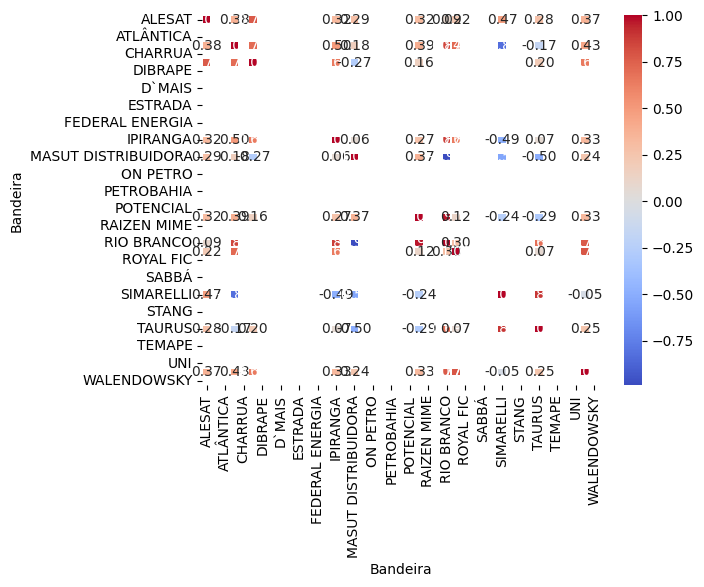

In [213]:
sns.heatmap(gp6E.loc['CO'].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.1)

<Axes: xlabel='Bandeira', ylabel='Bandeira'>

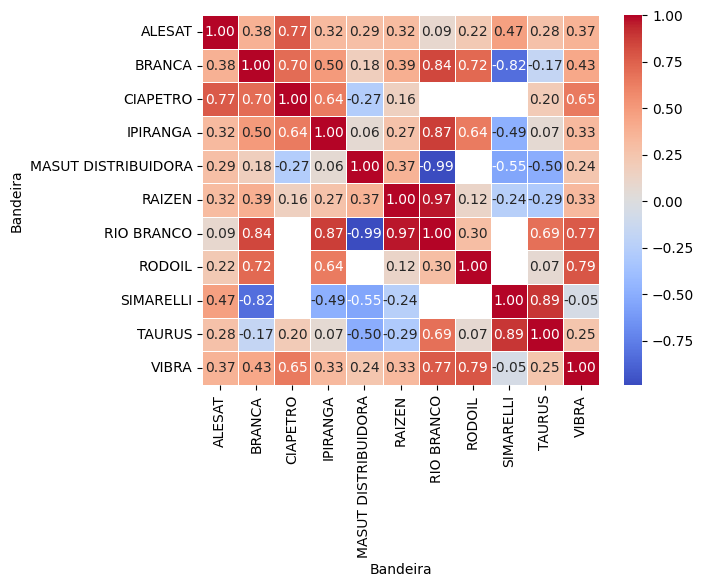

In [220]:
sns.heatmap(gp6E.loc['CO'].corr().dropna(axis=1, how='all').dropna(axis=0, how='all'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [219]:
gp6E.loc['CO'].corr().dropna(axis=1, how='all').dropna(axis=0, how='all')

Bandeira,ALESAT,BRANCA,CIAPETRO,IPIRANGA,MASUT DISTRIBUIDORA,RAIZEN,RIO BRANCO,RODOIL,SIMARELLI,TAURUS,VIBRA
Bandeira,,,,,,,,,,,
ALESAT,1.000000,0.378331,0.774075,0.322585,0.286799,0.316390,0.090196,0.223406,0.471395,0.277818,0.370161
BRANCA,0.378331,1.000000,0.703015,0.497297,0.176963,0.391482,0.837174,0.717993,-0.824574,-0.165755,0.430078
CIAPETRO,0.774075,0.703015,1.000000,0.639187,-0.272728,0.158849,NaN,NaN,NaN,0.202747,0.648055
IPIRANGA,0.322585,0.497297,0.639187,1.000000,0.061391,0.266051,0.868163,0.638558,-0.490383,0.067418,0.330326
MASUT DISTRIBUIDORA,0.286799,0.176963,-0.272728,0.061391,1.000000,0.365768,-0.987184,NaN,-0.546076,-0.500985,0.241544
RAIZEN,0.316390,0.391482,0.158849,0.266051,0.365768,1.000000,0.966093,0.118221,-0.244432,-0.294196,0.331278
RIO BRANCO,0.090196,0.837174,NaN,0.868163,-0.987184,0.966093,1.000000,0.295992,NaN,0.687846,0.769364
RODOIL,0.223406,0.717993,NaN,0.638558,NaN,0.118221,0.295992,1.000000,NaN,0.071459,0.785978
SIMARELLI,0.471395,-0.824574,NaN,-0.490383,-0.546076,-0.244432,NaN,NaN,1.000000,0.892761,-0.054631


In [ ]:
gp6E.loc['CO'].corr().dropna(axis=1, how='all').dropna(axis=0, how='all')